In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Tram-Amsterdam

## Generate Baseline Networks

In [4]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 9218.51it/s]


Calculate_degree possibly unhappy


In [5]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [6]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [7]:
city_tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)"


In [8]:
gpd.GeoDataFrame(city_tram_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_edges0502.GPKG',driver='GPKG')

In [9]:
# city_tram_edges[(city_tram_edges['from_id'] == 1231) & (city_tram_edges['to_id'] == 1232)]

In [10]:
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1231) & (city_tram_edges['to_id'] == 1232)].index, inplace=True)

In [11]:
# id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
# # id_connected_edges_length_sub

In [12]:
# city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

# city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
# city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
# city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub

In [13]:
# city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
# city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [14]:
# Delete edges which can cause the differences with routes
# tram 26-2
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
# # tram 4,14,24
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)

In [15]:
city_tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)"


In [16]:
city_tram_nodes

,geometry,degree,id
0,POINT (4.9324018 52.3610615),3,0
1,POINT (4.9321097 52.361227),3,1
2,POINT (4.934085 52.3609657),3,2
3,POINT (4.933017 52.3603624),3,3
4,POINT (4.9337809 52.3611734),3,4
...,...,...,...
1915,POINT (4.9009826 52.3777045),0,1915
1916,POINT (4.890644 52.3719008),2,1916
1917,POINT (4.9899502 52.3580579),2,1917
1918,POINT (4.9272548 52.357015),0,1918


In [17]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [18]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [19]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [20]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [21]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [22]:
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)
city_tram_ordered_edges

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
0,0,1,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,28.561299,0.002040,28,"(0, 1)","(1, 0)"
1,2,3,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,146.082551,0.010434,146,"(2, 3)","(3, 2)"
2,4,5,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,390.987463,0.027928,390,"(4, 5)","(5, 4)"
3,6,7,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,345.247175,0.024661,345,"(6, 7)","(7, 6)"
4,8,1730,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,35.152166,0.002511,35,"(8, 1730)","(1730, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1496,594,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,11.280287,0.000806,11,"(1496, 594)","(594, 1496)"
2200,562,1072,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,12.010525,0.000858,12,"(562, 1072)","(1072, 562)"
2201,1497,561,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,81.765515,0.005840,81,"(1497, 561)","(561, 1497)"
2202,566,1079,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,12.587379,0.000899,12,"(566, 1079)","(1079, 566)"


In [23]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]
duplicated_rows

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
293,335,336,27254598,"LINESTRING (4.8992828 52.3777499, 4.899074 52....",tram,None,293,33.538255,0.002396,33,"(335, 336)","(336, 335)"
293,336,335,27254598,"LINESTRING (4.8992828 52.3777499, 4.899074 52....",tram,None,293,33.538255,0.002396,33,"(336, 335)","(335, 336)"
458,492,491,90119531,"LINESTRING (4.9003819 52.3778942, 4.9003114 52...",tram,None,458,32.103815,0.002293,32,"(492, 491)","(491, 492)"
458,491,492,90119531,"LINESTRING (4.9003819 52.3778942, 4.9003114 52...",tram,None,458,32.103815,0.002293,32,"(491, 492)","(492, 491)"
624,634,633,191467397,"LINESTRING (4.8391817 52.3875635, 4.839195 52....",tram,None,624,45.449703,0.003246,45,"(634, 633)","(633, 634)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2100,677,1167,1006420683,"LINESTRING (4.9017423 52.3769963, 4.9017942 52...",tram,None,2100,26.807228,0.001915,26,"(677, 1167)","(1167, 677)"
2101,677,492,1006420684,"LINESTRING (4.8997415 52.3778918, 4.899621 52....",tram,None,2101,8.903983,0.000636,8,"(677, 492)","(492, 677)"
2101,492,677,1006420684,"LINESTRING (4.8997415 52.3778918, 4.899621 52....",tram,None,2101,8.903983,0.000636,8,"(492, 677)","(677, 492)"
2102,790,1442,1006420685,"LINESTRING (4.8999211 52.3779387, 4.8997415 52...",tram,None,2102,13.294746,0.000950,13,"(790, 1442)","(1442, 790)"


In [24]:
len(duplicated_rows)

62

In [25]:
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

In [26]:
G = nx.DiGraph()
for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

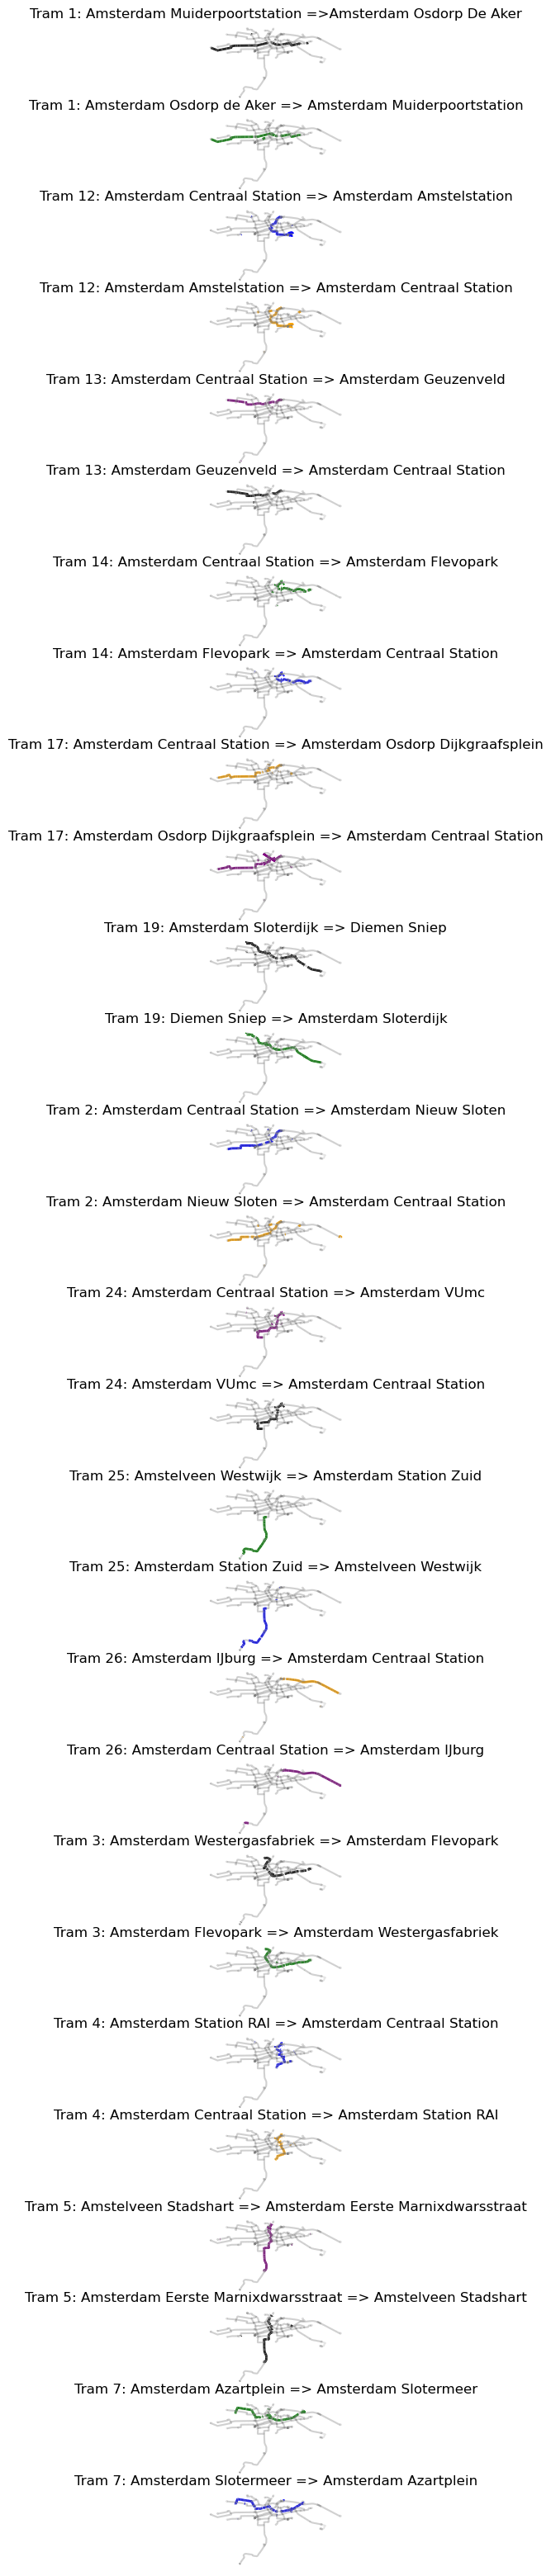

In [27]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# Plot all tram routes
plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

### Add columns to edges--city_tram_extended_edges

In [69]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [70]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [71]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [72]:
city_tram_extended_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1011,870,871,146.082551,0.010434,146,"(871, 870)","(870, 871)",NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3209,2364,1462,11.280287,0.000806,11,"(1462, 2364)","(2364, 1462)",NaN,NaN,NaN,NaN
2227,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3210,1430,1940,12.010525,0.000858,12,"(1940, 1430)","(1430, 1940)",NaN,NaN,NaN,NaN
2228,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3211,2365,1429,81.765515,0.005840,81,"(1429, 2365)","(2365, 1429)",NaN,NaN,NaN,NaN
2229,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3212,1434,1947,12.587379,0.000899,12,"(1947, 1434)","(1434, 1947)",NaN,NaN,NaN,NaN


### Organize edges dataframe for baseline network--city_tram_new_edges

In [73]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)
city_tram_shortest_path_edges_df

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from,count_weight,route_name_list,ref,route
0,868,869,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,28.561299,0.002040,28,"(868, 869)","(869, 868)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
1,2209,1496,770429442,"LINESTRING (4.9326128 52.3607965, 4.9325204 52...",tram,None,2862,15.783121,0.001127,15,"(2209, 1496)","(1496, 2209)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
2,1496,868,770429442,"LINESTRING (4.9325122 52.3609243, 4.9324018 52...",tram,None,2863,17.015621,0.001215,17,"(1496, 868)","(868, 1496)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
3,869,2371,770438581,"LINESTRING (4.9321097 52.361227, 4.9305569 52....",tram,None,2865,221.946033,0.015853,221,"(869, 2371)","(2371, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
4,2371,2474,770438581,"LINESTRING (4.9289422 52.3609314, 4.9288413 52...",tram,None,2866,238.554153,0.017040,238,"(2371, 2474)","(2474, 2371)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1902,2383,597894525,"LINESTRING (4.9334891 52.3725343, 4.9336504 52...",tram,None,2478,106.067531,0.007576,106,"(1902, 2383)","(2383, 1902)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram
1469,2383,2619,597894525,"LINESTRING (4.9348327 52.3730107, 4.9349469 52...",tram,None,2479,233.143567,0.016653,233,"(2383, 2619)","(2619, 2383)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram
1470,1280,1281,38365154,"LINESTRING (4.9386339 52.3753347, 4.9383667 52...",tram,None,1388,32.337647,0.002310,32,"(1280, 1281)","(1281, 1280)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram
1471,1281,1282,38365155,"LINESTRING (4.9383667 52.375575, 4.9379805 52....",tram,None,1389,157.783688,0.011270,157,"(1281, 1282)","(1282, 1281)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram


In [74]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')
city_tram_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
2,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
3,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
4,7045994,"LINESTRING (4.9152768 52.3652225, 4.915065 52....",tram,None,1015,2598,877,250.873163,0.017920,250,"(877, 2598)","(2598, 877)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1171248763,"LINESTRING (4.8935334 52.3671322, 4.893537 52....",tram,None,3164,2327,1633,12.550913,0.000896,12,"(1633, 2327)","(2327, 1633)",1.0,Tram 14: Amsterdam Centraal Station => Amsterd...,tram,"14, 4"
1496,1171248764,"LINESTRING (4.8935276 52.3672065, 4.8935288 52...",tram,None,3165,2189,2327,8.277607,0.000591,8,"(2327, 2189)","(2189, 2327)",1.0,Tram 14: Amsterdam Centraal Station => Amsterd...,tram,"14, 4"
1497,1171248765,"LINESTRING (4.8935276 52.3672065, 4.8935224 52...",tram,None,3166,2189,2328,10.712936,0.000765,10,"(2328, 2189)","(2189, 2328)",1.0,Tram 24: Amsterdam Centraal Station => Amsterd...,tram,24
1498,1171248766,"LINESTRING (4.8935108 52.3671108, 4.8934967 52...",tram,None,3167,2328,1635,19.092914,0.001364,19,"(1635, 2328)","(2328, 1635)",1.0,Tram 24: Amsterdam Centraal Station => Amsterd...,tram,24


### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [75]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [76]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [77]:
city_tram_shortest_path_nodes_id

,id
0,868
1,872
2,874
3,876
4,2598
...,...
1423,2777
1424,2779
1425,2780
1426,2754


In [78]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)
city_tram_new_nodes

,id,geometry,degree
0,868,POINT (4.9324018 52.3610615),3
1,872,POINT (4.9337809 52.3611734),3
2,874,POINT (4.9394 52.361617),3
3,876,POINT (4.9157261 52.365067),2
4,2598,POINT (4.9152768 52.3652225),2
...,...,...,...
1423,2777,POINT (4.9009806 52.3777485),2
1424,2779,POINT (4.8987647 52.3785952),2
1425,2780,POINT (4.8988204 52.3786244),2
1426,2754,POINT (4.8988712 52.3786582),2


### Add columns to stations--city_tram_new_staions

In [79]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [80]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [81]:
city_tram_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,2209,POINT (4.93261 52.36080),2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,2371,POINT (4.92894 52.36093),2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,2474,POINT (4.92570 52.36012),2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,2480,POINT (4.91674 52.35907),2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,2466,POINT (4.91359 52.36235),2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (4.92630 52.36814),2,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,2676,POINT (4.92960 52.37020),2,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,2383,POINT (4.93483 52.37301),2,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,2619,POINT (4.93817 52.37346),2,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [82]:
connect_stations_name,connect_stations_dataframe = select_connect_stations_one_network(city_tram_new_stations)

In [83]:
connect_stations_name

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [84]:
len(connect_stations_name)

16

In [85]:
# connect_stations_dataframe

### Build connection edges

In [86]:
id_new_edges_length_tram = city_tram_new_edges['id'].iloc[-1] + 1
id_new_edges_length_tram

3169

In [87]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name,city_tram_new_stations,id_new_edges_length_tram,city_tram_new_edges)

In [88]:
len(city_tram_connect_edges_dfs)

16

In [89]:
# city_tram_connected_edges

In [90]:
city_tram_connect_edges_dfs

{'Alexanderplein':     from_id  to_id       from_to       to_from  \
 0      2597   2366  (2597, 2366)  (2366, 2597)   
 1      2597   2465  (2597, 2465)  (2465, 2597)   
 2      2597   2671  (2597, 2671)  (2671, 2597)   
 3      2366   2597  (2366, 2597)  (2597, 2366)   
 4      2366   2465  (2366, 2465)  (2465, 2366)   
 5      2366   2671  (2366, 2671)  (2671, 2366)   
 6      2465   2597  (2465, 2597)  (2597, 2465)   
 7      2465   2366  (2465, 2366)  (2366, 2465)   
 8      2465   2671  (2465, 2671)  (2671, 2465)   
 9      2671   2597  (2671, 2597)  (2597, 2671)   
 10     2671   2366  (2671, 2366)  (2366, 2671)   
 11     2671   2465  (2671, 2465)  (2465, 2671)   
 
                                              geometry    distance    id  \
 0   LINESTRING (4.9196097 52.3634343, 4.9193627 52...   30.312744  3169   
 1   LINESTRING (4.9196097 52.3634343, 4.9192366 52...   90.196585  3170   
 2   LINESTRING (4.9196097 52.3634343, 4.9185684 52...  116.493550  3171   
 3   LINESTRI

In [91]:
# city_tram_connected_edges[city_tram_connected_edges['id'] == 3169]